Dataset is downloaded from Kaggle. Link: https://www.kaggle.com/giripujar/hr-analytics

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<h2>Exploratory Data Analysis and visualization</h2>

In [4]:
left = df[df.left==1]
left.shape

(3571, 10)

In [5]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [6]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,
<ol>
    <li>**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)</li>
    <li>**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)</li>
    <li>**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm </li>
</ol>

**Salary on employee's retention**

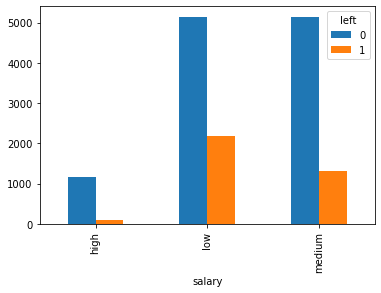

In [7]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company

**Department on employee retention rate**

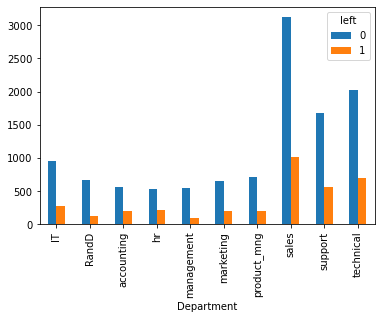

In [8]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

<h3>From the above we can infer that the following variables can be taken as independant variables in our model</h3>
<ol>
    <li>Salary</li>
    <li>Satisfaction Level</li>
    <li>Average Monthly Hours</li>
    <li>Promotion Last 5 Years</li>
</ol>

In [9]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


**dummy variable in salary**

Salary has all text data. It needs to be converted to numbers and here using dummy variables.

In [16]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [15]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [17]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [18]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [19]:
y = df.left

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_test

7269     0
8160     0
6100     0
2303     0
10545    0
        ..
8327     0
1072     1
13937    0
9426     0
11412    0
Name: left, Length: 10500, dtype: int64

In [26]:
print(model.predict(X_test))

[0 0 0 ... 0 0 0]


In [23]:
print ("Model Accuracy : {}".format(model.score(X_test,y_test)))

Model Accuracy : 0.7702857142857142
